# Project 2: Reinforcement Learning  
Author: Harrison Sun (sun.har@northeastern.edu)  
GitHub: https://github.com/harrisonlsun/Reinforcement-Learning-Value-and-Policy-Iteration

## Part 1: Maze Problem

In [59]:
"""
import libraries
"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

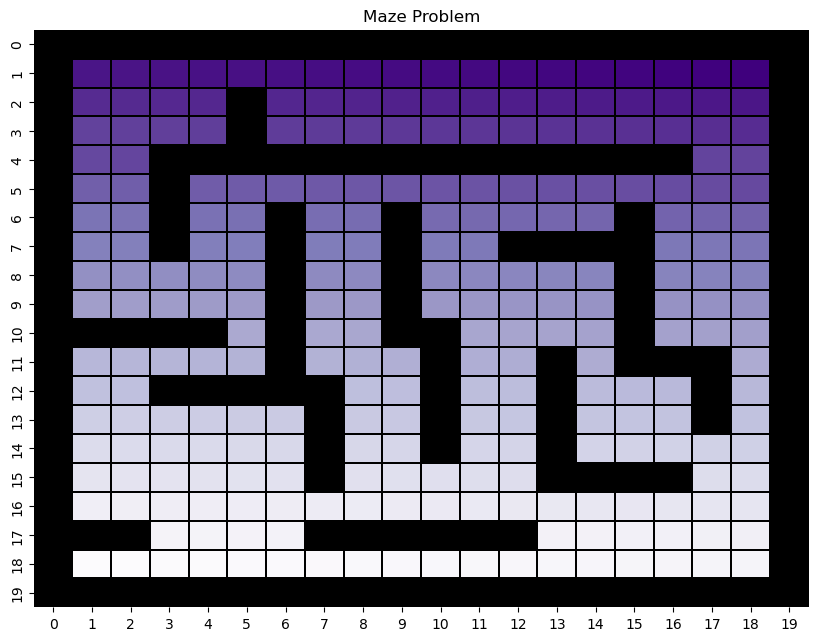

In [60]:
State_Matrix = \
    np.array([[np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN],
              [np.NAN, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, np.NAN],
              [np.NAN, 214, 215, 216, 217,   np.NAN, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, np.NAN],
              [np.NAN, 197, 198, 199, 200,   np.NAN, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, np.NAN],
              [np.NAN, 193, 194,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 195, 196, np.NAN],
              [np.NAN, 176, 177,   np.NAN, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, np.NAN],
              [np.NAN, 162, 163,   np.NAN, 164, 165,   np.NAN, 166, 167,   np.NAN, 168, 169, 170, 171, 172,   np.NAN, 173, 174, 175, np.NAN],
              [np.NAN, 151, 152,   np.NAN, 153, 154,   np.NAN, 155, 156,   np.NAN, 157, 158,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 159, 160, 161, np.NAN],
              [np.NAN, 136, 137, 138, 139, 140,   np.NAN, 141, 142,   np.NAN, 143, 144, 145, 146, 147,   np.NAN, 148, 149, 150, np.NAN],
              [np.NAN, 121, 122, 123, 124, 125,   np.NAN, 126, 127,   np.NAN, 128, 129, 130, 131, 132,   np.NAN, 133, 134, 135, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, 111,   np.NAN, 112, 113,   np.NAN,   np.NAN, 114, 115, 116, 117,   np.NAN, 118, 119, 120, np.NAN],
              [np.NAN,  99, 100, 101, 102, 103,   np.NAN, 104, 105, 106,   np.NAN, 107, 108,   np.NAN, 109,   np.NAN,   np.NAN,   np.NAN, 110, np.NAN],
              [np.NAN,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   np.NAN,  93,  94,   np.NAN,  95,  96,  97,   np.NAN,  98, np.NAN],
              [np.NAN,  75,  76,  77,  78,  79,  80,   np.NAN,  81,  82,   np.NAN,  83,  84,   np.NAN,  85,  86,  87,   np.NAN,  88, np.NAN],
              [np.NAN,  60,  61,  62,  63,  64,  65,   np.NAN,  66,  67,   np.NAN,  68,  69,   np.NAN,  70,  71,  72,  73,  74, np.NAN],
              [np.NAN,  47,  48,  49,  50,  51,  52,   np.NAN,  53,  54,  55,  56,  57,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  58,  59, np.NAN],
              [np.NAN,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,  19,  20,  21,  22,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,  23,  24,  25,  26,  27,  28, np.NAN],
              [np.NAN,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, np.NAN],
              [np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN,   np.NAN, np.NAN]])
        

plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

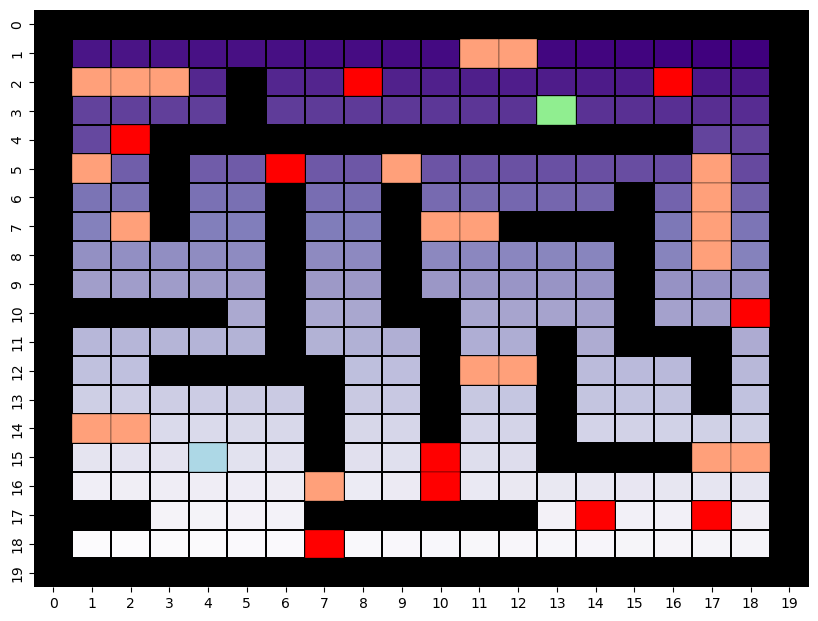

In [61]:
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='black', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='black', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='black', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='black', lw=0.25))

plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'Purples')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                start_state=(15,4),end_state=(3,13))
plt.show()

In [62]:
end = +200      # Reward for reaching the end state
oil = -5        # Reward for stepping on an oil block
bump = -10      # Reward for stepping on a bump block
action = -1     # Reward for taking an action (every move)

In [63]:
def reward(s):
    if s == (3, 13): # End state
        return action + end
    elif s in [(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)]:
        return action + oil
    elif s in [(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)]:
        return action + bump
    else:
        return action

In [64]:
def plot_policy_path(policy, start_state, grid_shape):
    direction_mapping = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
    current_state = start_state
    path = []
    
    # Generate the path based on the policy
    for _ in range(np.prod(grid_shape)):  # Limit the path length to avoid infinite loops
        action = policy[current_state]
        direction = direction_mapping[action]
        path.append((current_state, direction))
        
        if direction == 'right':
            next_state = (current_state[0], current_state[1] + 1)
        elif direction == 'left':
            next_state = (current_state[0], current_state[1] - 1)
        elif direction == 'up':
            next_state = (current_state[0] - 1, current_state[1])
        elif direction == 'down':
            next_state = (current_state[0] + 1, current_state[1])
        
        if 0 <= next_state[0] < grid_shape[0] and 0 <= next_state[1] < grid_shape[1]:
            current_state = next_state
        else:
            break  # Stop if we reach the edge of the grid
    
    # Heatmap generation
    plt.subplots(figsize=(10,7.5))    
    heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                        cbar= False, cmap= 'Purples')
    heatmap.set_facecolor('black')  # Color for the NaN cells in the state matrix

    # coloring_blocks function
    coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], 
                    bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], 
                    start_state=(15,4), end_state=(3,13))

    # Plotting the path with arrows
    for state_cr, direction in path:
        r, c = state_cr
        if direction == 'right':
            plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')
        elif direction == 'left':
            plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')
        elif direction == 'up':
            plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')
        elif direction == 'down':
            plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')

    plt.show()


In [65]:
def draw_policy(State_Matrix, policy):
    # Define the shape of the grid
    grid_shape = State_Matrix.shape

    # Define the mapping of actions to arrows
    action_arrows = {0: '↓', 1: '↑', 2: '←', 3: '→'}

    # Define the mapping of actions to colors
    action_colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'orange'}

    # Create a grid of zeros with the same shape as the state matrix
    action_grid = np.zeros(grid_shape)

    # Map the actions to the grid
    for r in range(grid_shape[0]):
        for c in range(grid_shape[1]):
            action = policy[(r, c)]
            action_grid[r, c] = action

    # Create the plot
    plt.figure(figsize=(grid_shape[1], grid_shape[0]))
    plt.xlim(0, grid_shape[1])
    plt.ylim(0, grid_shape[0])
    plt.gca().invert_yaxis()

    # Add the arrows to the plot
    for r in range(grid_shape[0]):
        for c in range(grid_shape[1]):
            action = action_grid[r, c]
            plt.arrow(c + 0.5, r + 0.5, 0, -0.4, head_width=0.2, head_length=0.2, fc=action_colors[action], ec=action_colors[action])

    plt.grid()
    plt.show()

### 1.1: This portion uses vector-form Policy Iteration to find optimal policy and optimal state values.
a. $p=0.02, \gamma = 0.95, \theta = 0.01$ (Base Scenario)  
b. $p=0.5, \gamma = 0.95, \theta = 0.01$ (Large Stochasticity Scenario)  
c. $p=0.02, \gamma = 0.55, \theta = 0.01$ (Small Discount Factor Scenario)

[[2 2 2 2 2 1 1 2 0 0 1 1 0 2 2 0 0 0 0 2]
 [3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 2 2 2 2 3]
 [0 0 0 3 0 1 3 1 3 3 3 3 1 1 1 2 2 1 2 1]
 [0 3 3 3 0 2 3 3 3 3 3 3 3 1 2 2 2 2 2 2]
 [1 0 0 2 1 3 1 3 2 1 1 2 0 0 1 0 1 0 0 1]
 [3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 1]
 [0 3 0 3 0 0 0 3 0 0 3 3 3 3 0 1 0 0 0 1]
 [2 0 0 3 0 0 0 0 0 1 0 0 2 2 3 3 0 0 0 3]
 [3 0 0 2 2 0 0 0 0 1 0 0 2 2 2 2 0 0 0 1]
 [0 0 0 2 0 0 3 0 0 2 0 0 0 2 2 3 0 0 0 0]
 [3 0 1 0 2 0 3 0 0 3 0 0 0 0 2 2 0 0 0 3]
 [1 3 3 3 3 0 2 0 0 2 1 0 0 3 0 0 1 3 0 3]
 [1 0 0 2 0 3 0 2 0 0 3 0 0 3 3 1 1 2 0 2]
 [1 0 0 2 2 2 1 0 0 0 3 0 0 3 3 1 1 3 0 3]
 [0 0 0 0 2 1 1 2 0 0 0 0 0 1 3 3 3 3 0 0]
 [1 0 0 0 3 3 1 2 0 3 3 0 0 3 3 0 2 0 0 1]
 [0 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 0 0 2]
 [3 1 2 3 3 3 0 1 0 1 3 0 0 0 3 3 0 0 0 2]
 [2 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 0 3]
 [1 0 1 3 3 2 0 1 2 1 3 1 0 0 3 3 3 2 0 2]]
[[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.    

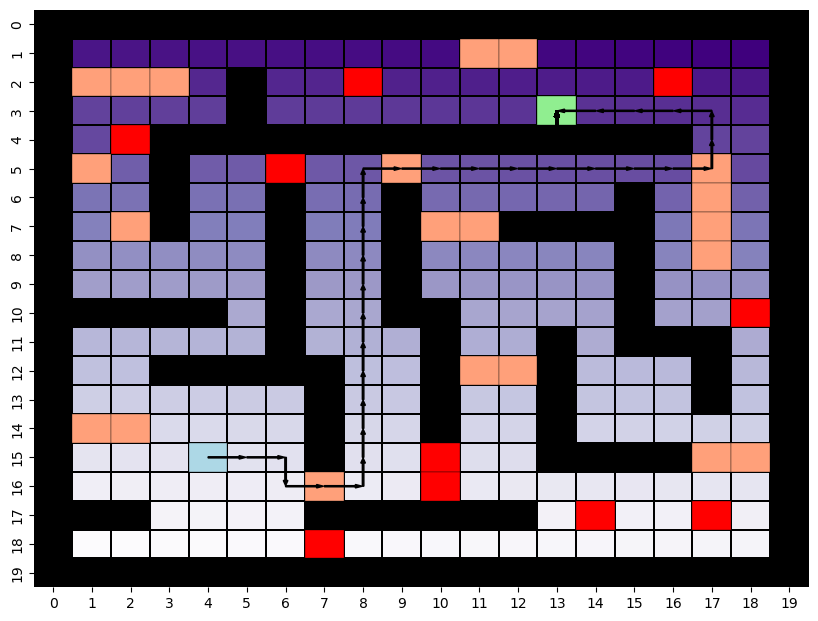

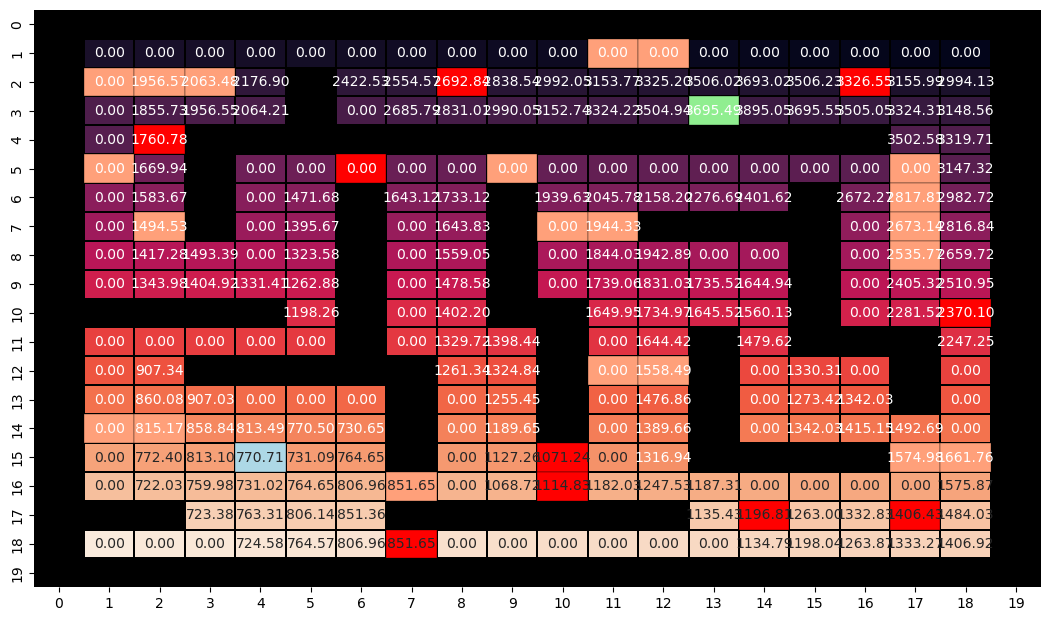

In [66]:
def vector_form_policy_iteration(State_Matrix, p, gamma, theta):
    V = np.zeros(State_Matrix.shape)
    policy = np.random.randint(0, 4, State_Matrix.shape)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for i in range(State_Matrix.shape[0]):
                for j in range(State_Matrix.shape[1]):
                    if not np.isnan(State_Matrix[i, j]):
                        v = V[i, j]
                        bellman_sum = 0
                        for action, (a, b) in enumerate(actions):
                            next_i, next_j = i + a, j + b
                            if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                                prob = p if policy[i, j] == action else (1 - p) / 3
                                bellman_sum += prob * (reward((next_i, next_j)) + gamma * V[next_i, next_j])
                            else:
                                bellman_sum += (p if policy[i, j] == action else (1 - p) / 3) * (reward((i, j)) + gamma * V[i, j])
                        V[i, j] = bellman_sum
                        delta = max(delta, np.abs(v - V[i, j]))
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for i in range(State_Matrix.shape[0]):
            for j in range(State_Matrix.shape[1]):
                if not np.isnan(State_Matrix[i, j]):
                    old_action = policy[i, j]
                    action_values = []
                    for action, (a, b) in enumerate(actions):
                        next_i, next_j = i + a, j + b
                        if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] and not np.isnan(State_Matrix[next_i, next_j]):
                            action_value = p * (reward((next_i, next_j)) + gamma * V[next_i, next_j]) + (1 - p) / 3 * sum(reward((next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j)) + gamma * V[next_i if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else i, next_j if 0 <= next_i < State_Matrix.shape[0] and 0 <= next_j < State_Matrix.shape[1] else j] for other_action in actions if other_action != (a, b))
                        else:
                            action_value = reward((i, j)) + gamma * V[i, j]
                        action_values.append(action_value)
                    policy[i, j] = np.argmax(action_values)
                    if old_action != policy[i, j]:
                        policy_stable = False
        if policy_stable:
            return policy, V
        else:
            continue # Not needed, but makes the code more readable

# 1.1 Part A
policy, V = vector_form_policy_iteration(State_Matrix, 1-0.02, 0.95, 0.01) 
print(policy)
print(V)
plot_policy_path(policy, (15, 4), State_Matrix.shape)
#draw_policy(State_Matrix, policy)

# plot the value function values on the heat map
plt.subplots(figsize=(13,7.5))

# Create a 2D matrix of zeros with size of 20 x 20 
State_Matrix_heatmap = np.zeros((20,20)) 

for i in range(18):
    for j in range(18):
        # Assign new 2D matrix with the value function value at the current state
        State_Matrix_heatmap[i+1, j+1] = V[i][j]

# Plot the new heatmap of the new value function values with the original state and coloring blocks
heatmap = sns.heatmap(State_Matrix, fmt=".2f", annot= State_Matrix_heatmap, linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')

heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
coloring_blocks(heatmap, oil_states=[(4,2),(5,6), (2,8), (2,16), (10,18), (15,10), (16,10), (18,7), (17,14), (17,17)], bump_states=[(5,1), (7,2), (1,11), (1,12), (2,1), (2,2), (2,3), (5,17), (6,17), (7,17), (8,17), (7,10), (7,11), (5,9), (12,11), (12,12), (15,17), (15,18), (16,7), (14,1), (14,2)], \
                start_state=(15,4),end_state=(3,13))
plt.show()